<a href="https://colab.research.google.com/github/yokesh412/EDA-ANALYSIS/blob/main/Copy_of_Copy_of_Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-EDA AIRBNB BOOKING/Copy of Airbnb NYC 2019.csv')

In [ ]:
dataset.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
print(dataset.size)

782320


In [ ]:
dataset.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
print(dataset.shape)

(48895, 16)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
dataset['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
dataset['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
import numpy as np


In [ ]:
#MISSING VALUES
#CHECKING PERCENTAGE OF MISSING VALUES IN EACH FEATURES
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

name 0.0003  % missing values
host_name 0.0004  % missing values
last_review 0.2056  % missing values
reviews_per_month 0.2056  % missing values


In [ ]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#filling null values
dataset['reviews_per_month'].fillna(int(dataset['reviews_per_month'].mean()),inplace=True)

In [ ]:
dataset['last_review'] = dataset['last_review'].fillna(0)

dataset['name'] = dataset['name'].fillna(0)
dataset['host_name'] = dataset['host_name'].fillna(0)

In [ ]:
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#numerical features
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  10


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,1.00,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 10


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

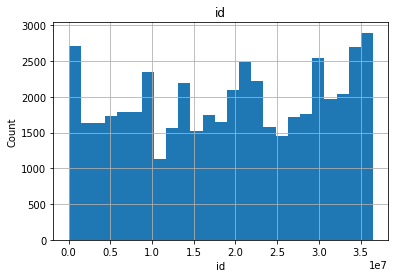

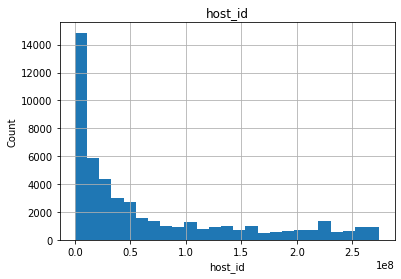

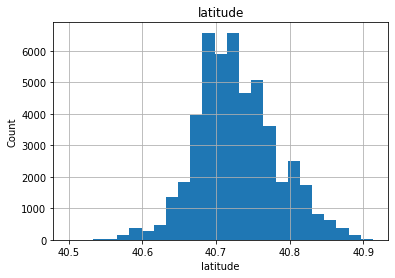

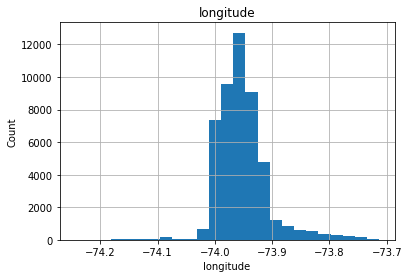

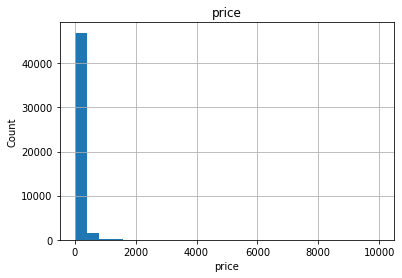

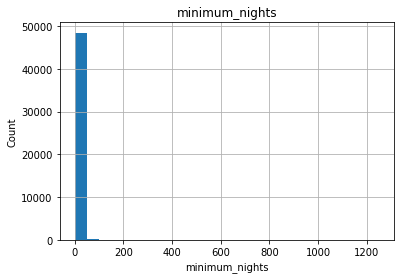

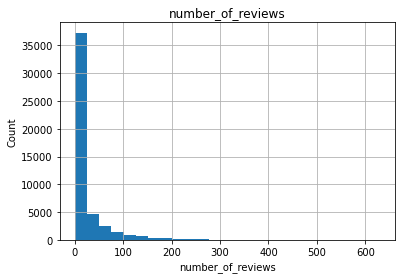

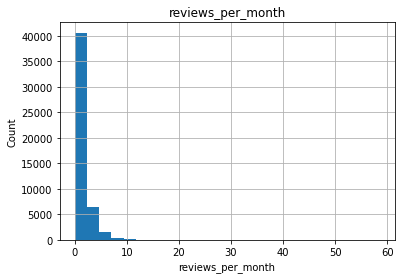

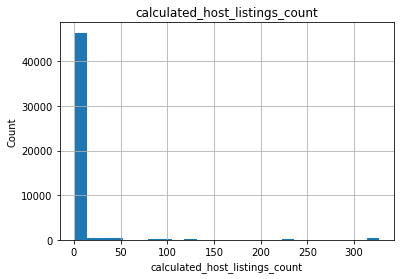

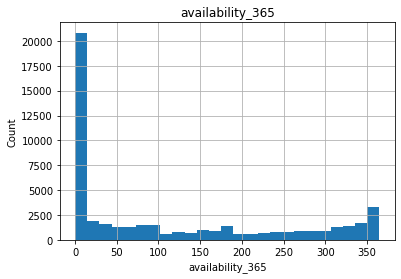

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Observation:

From above histogram we can see that some of the independent variables are highly skewed.we have to apply log transformaton for that particular variable

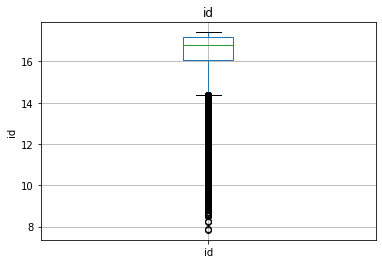

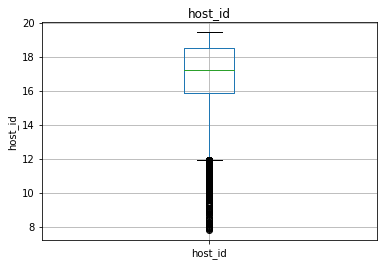

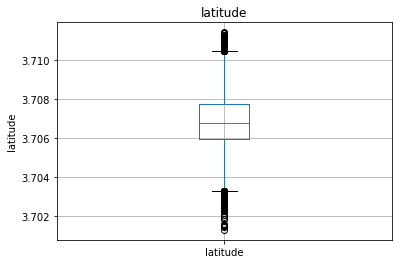

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


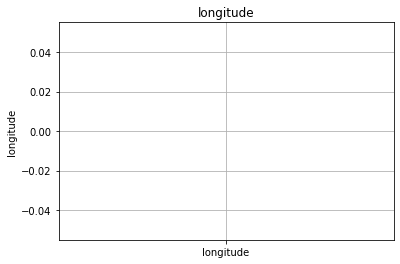

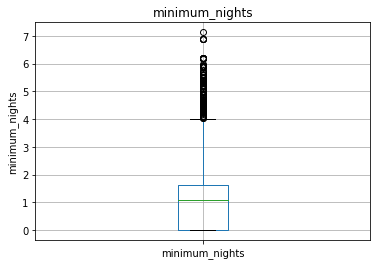

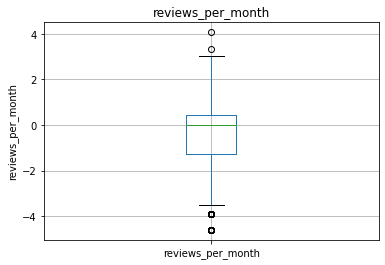

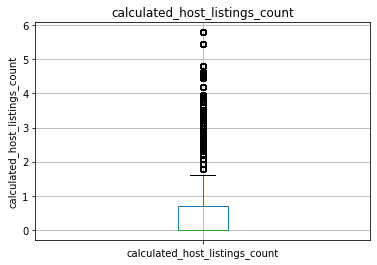

In [ ]:
#checking outliers using box plot
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Observation:

From above box plot we can see large number of outliers found in the variable.we have to remove or  replace this outliers

In [ ]:
#categorical features
#list number of categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
dataset[categorical_features].head()


Number of categorical variables:  6


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,0
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is name and number of categories are 47906
The feature is host_name and number of categories are 11453
The feature is neighbourhood_group and number of categories are 5
The feature is neighbourhood and number of categories are 221
The feature is room_type and number of categories are 3
The feature is last_review and number of categories are 1765


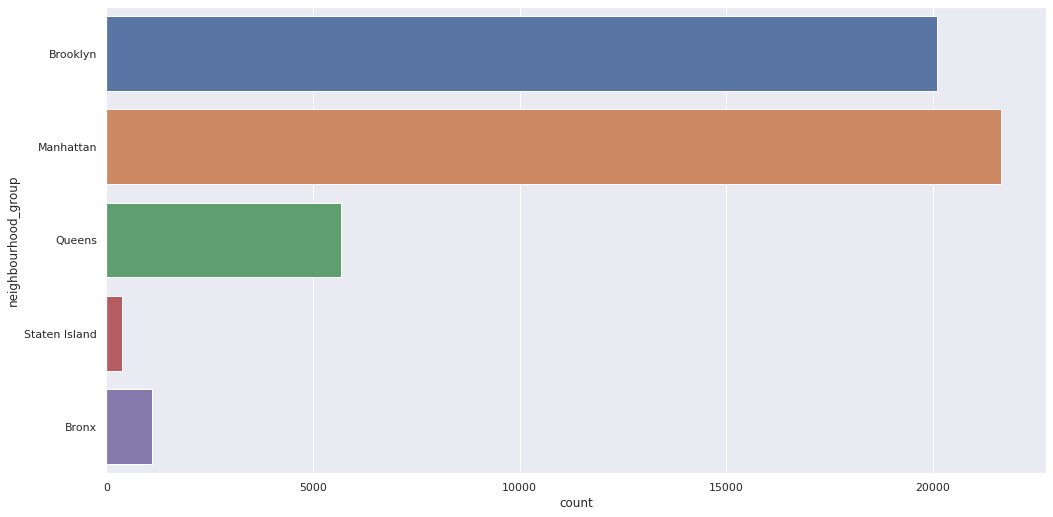

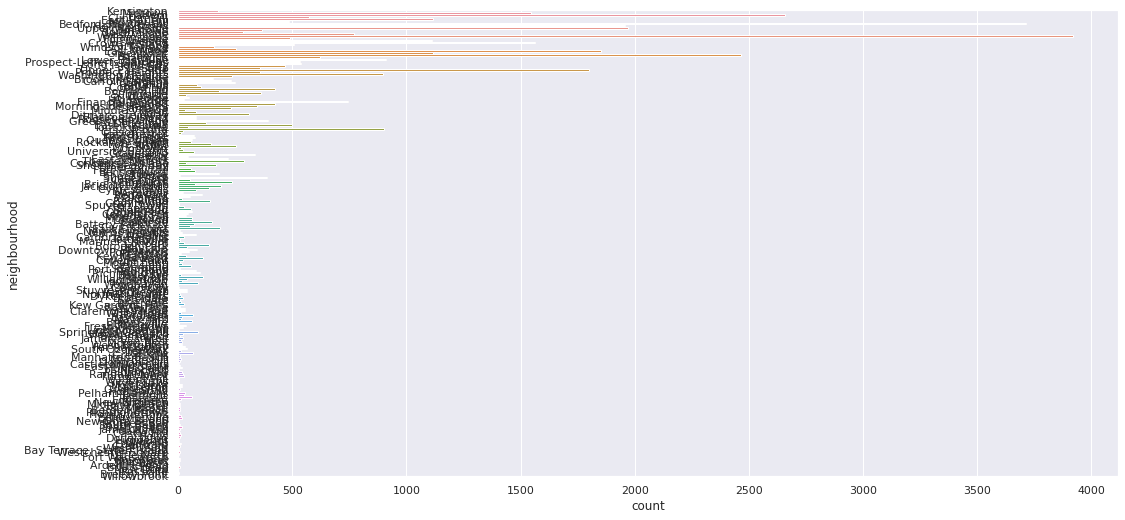

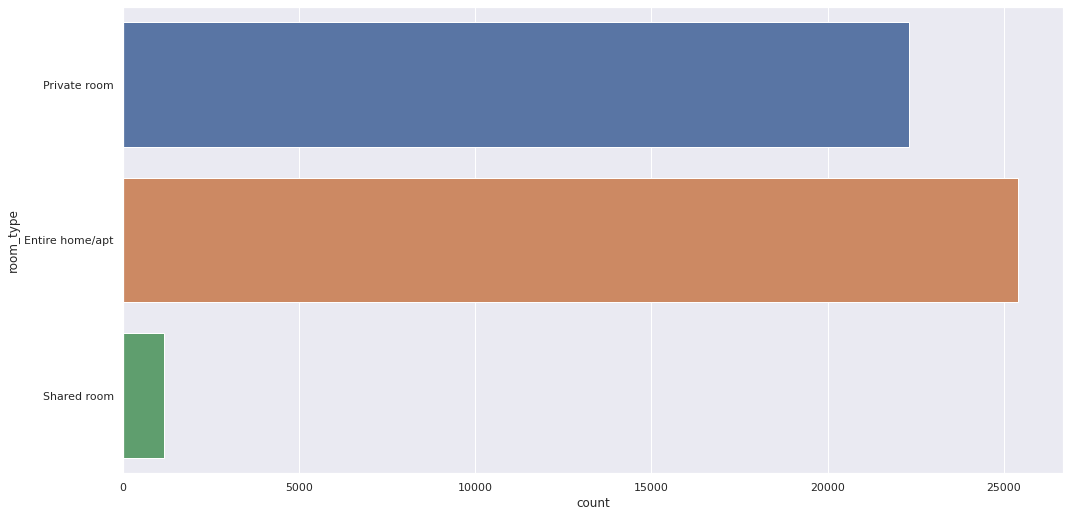

In [ ]:
#ploting categorical variable
for col in dataset.select_dtypes(include='object'):
    if dataset[col].nunique() <= 500:
        sns.countplot(y=col, data=dataset)
        plt.show()

In [ ]:
#busiest host
busiest_host = dataset['host_name'].value_counts().head(15)

[Text(0, 0, 'Michael'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Sonder (NYC)'),
 Text(0, 0, 'John'),
 Text(0, 0, 'Alex'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Sarah'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Jessica'),
 Text(0, 0, 'Maria'),
 Text(0, 0, 'Mike'),
 Text(0, 0, 'Andrew'),
 Text(0, 0, 'Anna'),
 Text(0, 0, 'Chris'),
 Text(0, 0, 'Laura')]

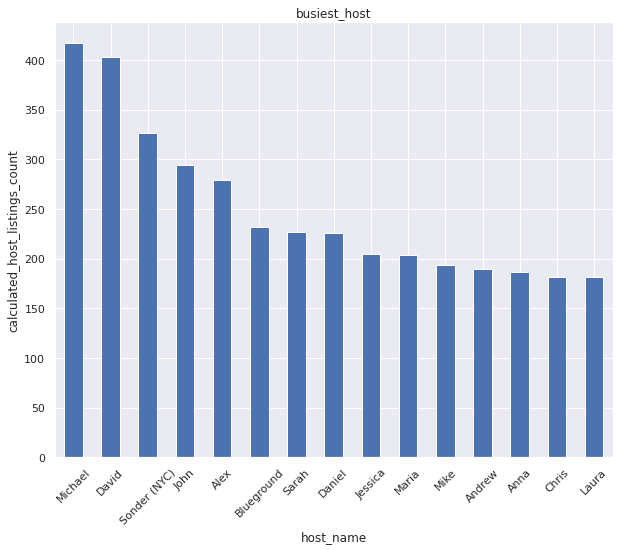

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = busiest_host.plot(kind='bar')
viz_bar.set_title('busiest_host')
viz_bar.set_xlabel('host_name')
viz_bar.set_ylabel('calculated_host_listings_count')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

Observation:

From above bar diagram,we can able to see top 10 busiest host

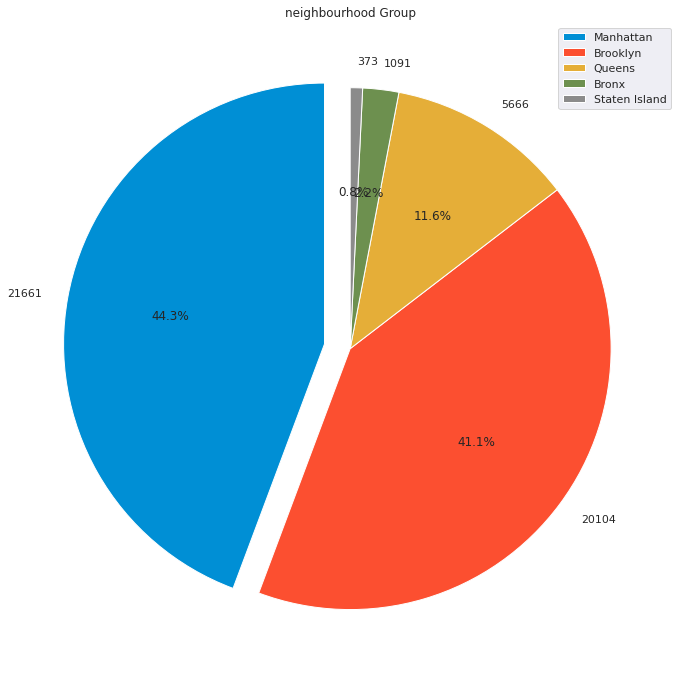

In [ ]:
#Top Region Area
labels = dataset.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = dataset.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('neighbourhood Group')
plt.show()

Observation:

From above piechart,we can see large number of bookings are from manhattan and brooklyn 

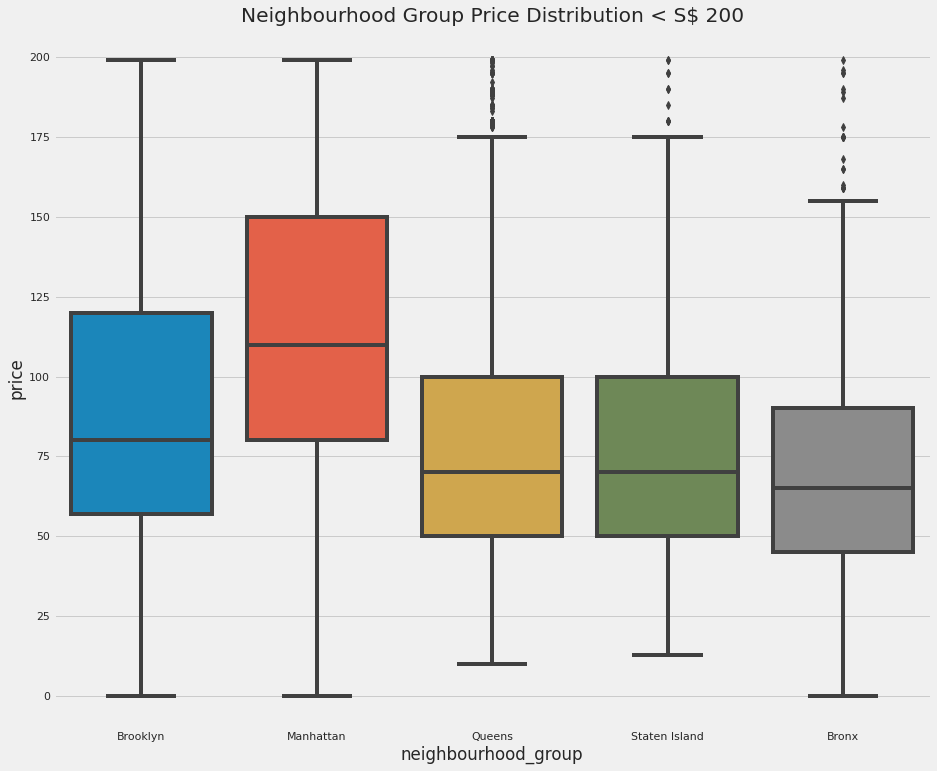

In [ ]:
dataset_1 = dataset[dataset.price < 200]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = dataset_1)
plt.title('Neighbourhood Group Price Distribution < S$ 200')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



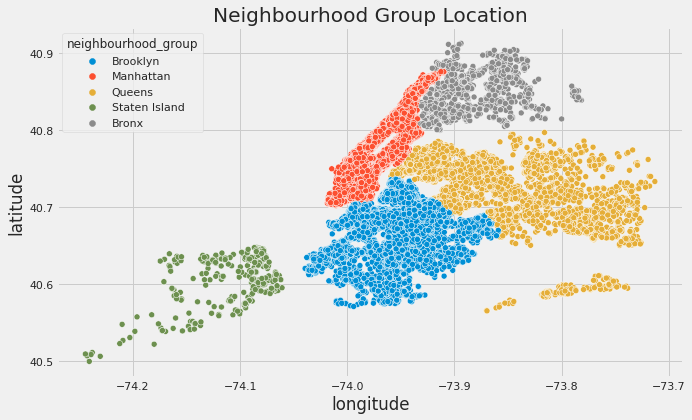

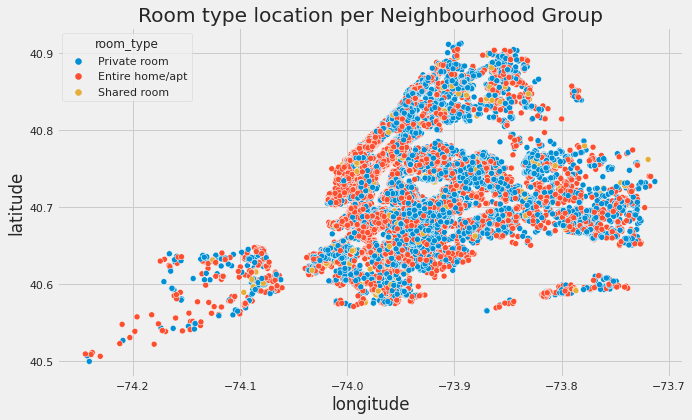

In [ ]:
#visualizing Neighbourhood Group Location
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(dataset.longitude,dataset.latitude,hue=dataset.neighbourhood_group).set_title(title)
plt.ioff()
#visualising room type location per Neighbourhood Group
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(dataset.longitude,dataset.latitude,hue=dataset.room_type).set_title(title)
plt.ioff()

Observation:

From above map , we can see that shared rooms are less when compared to private room and entire home/apt

In [ ]:
#properties recieving highest reviews.
highest_reviews = dataset[['host_id','number_of_reviews']].sort_values(by='number_of_reviews', ascending=False)[:20]
highest_reviews.head()

,host_id,number_of_reviews
11759,47621202,629
2031,4734398,607
2030,4734398,597
2015,4734398,594
13495,47621202,576


[Text(0, 0, '11759'),
 Text(0, 0, '2031'),
 Text(0, 0, '2030'),
 Text(0, 0, '2015'),
 Text(0, 0, '13495'),
 Text(0, 0, '10623'),
 Text(0, 0, '1879'),
 Text(0, 0, '20403'),
 Text(0, 0, '4870'),
 Text(0, 0, '471'),
 Text(0, 0, '1271'),
 Text(0, 0, '113'),
 Text(0, 0, '8001'),
 Text(0, 0, '13612'),
 Text(0, 0, '225'),
 Text(0, 0, '1103'),
 Text(0, 0, '1190'),
 Text(0, 0, '9323'),
 Text(0, 0, '2163'),
 Text(0, 0, '257')]

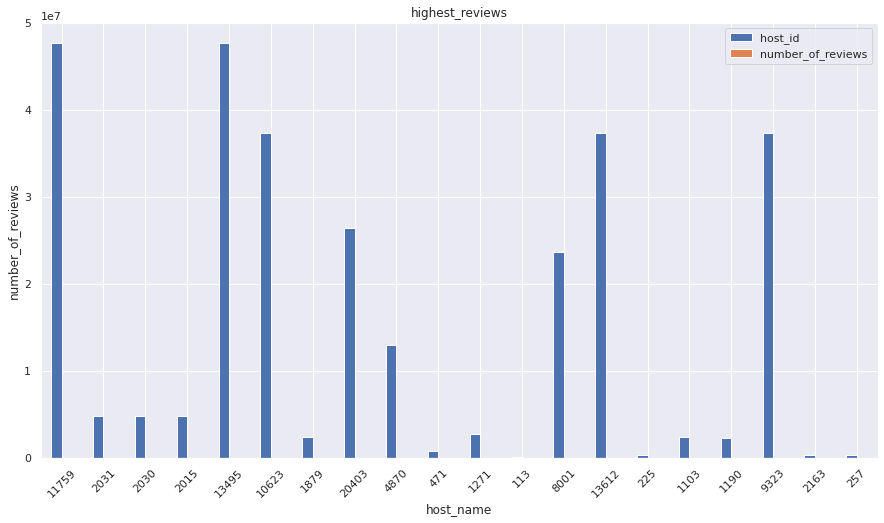

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
viz_bar = highest_reviews.plot(kind='bar')
viz_bar.set_title('highest_reviews')
viz_bar.set_xlabel('host_name')
viz_bar.set_ylabel('number_of_reviews')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

Observation:

From above bar chart ,we can see properties which received highest reviews.

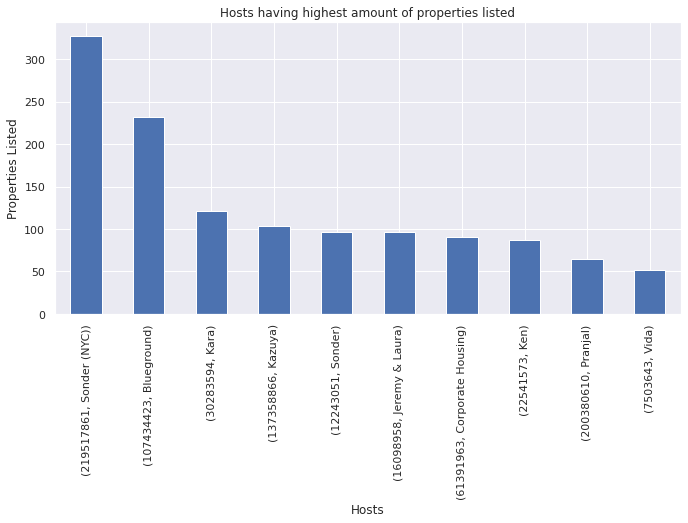

In [ ]:
#host having highest amount of properties listed.
highest_props_host = dataset.groupby(['host_id', 'host_name'])['host_id'].count().sort_values(ascending=False)[:10]
highest_props_host.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Properties Listed')
plt.title('Hosts having highest amount of properties listed');

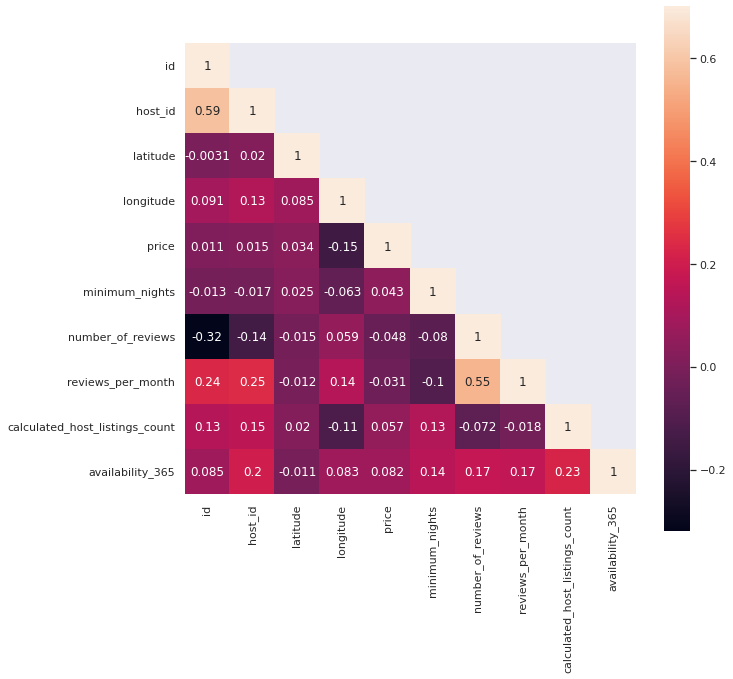

In [ ]:
correlation_map = dataset[dataset.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)


observation:

From above correlation heat map,we can able to see the variable which are highly correlated.for example,calculated host listing count,number of reviews and reiews per month are highly correlated to availablity_365 variable.